In [9]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from tf_lab.fundamentals.utils import set_visible_GPUs
import tf_lab.point_clouds.in_out as pio
import tf_lab.models.point_net_based_AE as pnAE
from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
from tf_lab.point_clouds.in_out import PointCloudDataSet
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.autoencoder import Configuration as Conf
import tf_lab.point_clouds.various_encoders_decoders as enc_dec

from tf_lab.autopredictors.evaluate.basics import eval_model, read_saved_epochs
from tf_lab.autopredictors.plotting.basics import plot_original_pclouds_vs_reconstructed,\
                                                  plot_train_val_test_curves, plot_reconstructions_at_epoch


from general_tools.in_out.basics import create_dir, delete_files_in_directory, files_in_subdirs
from geo_tool import Point_Cloud

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
full_pclouds_path = osp.join(top_data_dir, 'ShapeNetPointClouds/from_manifold_meshes/1024/')

experiment_name = 'enc_filter_1_simple_decode_full_SN'
train_dir = osp.join(top_data_dir, 'OUT/models/vanilla_ae')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

'/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/vanilla_ae/enc_filter_1_simple_decode_full_SN'

In [4]:
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path)
full_pclouds, full_model_names, class_ids = pio.load_crude_point_clouds(file_names=full_file_names, n_threads=11)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

52103 files containing complete point clouds were found.


In [7]:
train_data_, val_data_, test_data_ = pio.train_validate_test_split([full_pclouds,                                                             
                                                            full_model_names],
                                                            train_perc=0.8,
                                                            validate_perc=0.1,
                                                            test_perc=0.1,
                                                            seed=seed)

train_data = PointCloudDataSet(train_data_[0], labels=train_data_[1])
val_data = PointCloudDataSet(val_data_[0], labels=val_data_[1])
test_data = PointCloudDataSet(test_data_[0], labels=test_data_[1])

In [10]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

set_visible_GPUs([1])

conf = Conf(n_input = [1024, 3],
               training_epochs = 1000,
               batch_size = 80,
               loss = 'Chamfer',
               train_dir = train_dir,
               loss_display_step = 1,
               saver_step = 5,
               learning_rate = 0.00002,
               saver_max_to_keep = 200,
               gauss_augment = {'mu': 0,'sigma': 0.02},
               encoder = pnAE.encoder,
               decoder = enc_dec.decoder_only_with_fc
               )

reset_graph()
ae = PointNetAutoEncoder(experiment_name, conf)

In [11]:
ae.train(train_data, conf)

('Epoch:', '0001', 'training time (minutes)=', '2.4188', 'loss=', '0.004486597')
('Epoch:', '0002', 'training time (minutes)=', '2.4155', 'loss=', '0.002404723')
('Epoch:', '0003', 'training time (minutes)=', '2.7055', 'loss=', '0.002086370')
('Epoch:', '0004', 'training time (minutes)=', '2.5045', 'loss=', '0.001942914')
('Epoch:', '0005', 'training time (minutes)=', '2.4094', 'loss=', '0.001851545')
('Epoch:', '0006', 'training time (minutes)=', '2.4101', 'loss=', '0.001786396')
('Epoch:', '0007', 'training time (minutes)=', '2.4163', 'loss=', '0.001736052')
('Epoch:', '0008', 'training time (minutes)=', '2.7873', 'loss=', '0.001694902')
('Epoch:', '0009', 'training time (minutes)=', '2.4125', 'loss=', '0.001661375')
('Epoch:', '0010', 'training time (minutes)=', '2.4107', 'loss=', '0.001632032')
('Epoch:', '0011', 'training time (minutes)=', '2.4123', 'loss=', '0.001606991')
('Epoch:', '0012', 'training time (minutes)=', '2.7543', 'loss=', '0.001584521')
('Epoch:', '0013', 'training

[(1, 0.0044865967529770451, 145.12578797340393),
 (2, 0.0024047234719494024, 144.92818903923035),
 (3, 0.0020863698914311041, 162.32757306098938),
 (4, 0.0019429143274206518, 150.26959800720215),
 (5, 0.00185154512928595, 144.56307005882263),
 (6, 0.0017863962369847636, 144.60813283920288),
 (7, 0.0017360524603321204, 144.9793438911438),
 (8, 0.0016949021862104764, 167.23560976982117),
 (9, 0.0016613754436227131, 144.74893283843994),
 (10, 0.0016320322029339061, 144.64111804962158),
 (11, 0.0016069906578719216, 144.73686695098877),
 (12, 0.0015845206620228869, 165.25622701644897),
 (13, 0.001564099971337276, 143.77125096321106),
 (14, 0.0015467957480883874, 144.6876139640808),
 (15, 0.0015304897314799152, 144.5982689857483),
 (16, 0.001516434646903353, 145.5857698917389),
 (17, 0.0015017392755988378, 166.5052969455719),
 (18, 0.0014896135113153771, 144.72657895088196),
 (19, 0.0014785145368738076, 144.63389611244202),
 (20, 0.0014679393808816822, 144.71379709243774),
 (21, 0.0014580313

In [15]:
saved_epochs = read_saved_epochs(conf.train_dir)
epochs = saved_epochs[::len(saved_epochs)/10]
stats = eval_model(ae, conf, [train_data, test_data, val_data], epochs=epochs, verbose=True)

Model restored in epoch 5.
[ 0.00181586  0.00180141  0.00180021]
Model restored in epoch 105.
[ 0.0012248   0.00122929  0.00122925]
Model restored in epoch 205.
[ 0.00116322  0.00116949  0.00117045]
Model restored in epoch 305.
[ 0.0011322   0.00114118  0.0011416 ]
Model restored in epoch 405.
[ 0.00111273  0.0011229   0.00112323]
Model restored in epoch 505.
[ 0.00109716  0.00110854  0.00110824]
Model restored in epoch 605.
[ 0.00108513  0.00109716  0.00109703]
Model restored in epoch 705.
[ 0.00107671  0.00108963  0.00108915]
Model restored in epoch 805.
[ 0.0010682   0.00108209  0.00108137]
Model restored in epoch 905.
[ 0.00106053  0.00107499  0.00107425]


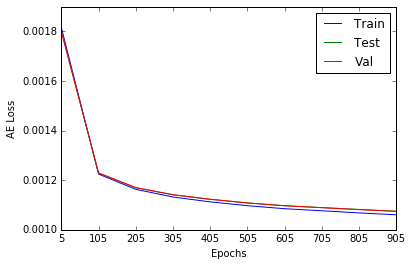

In [16]:
top_save_dir = osp.join(top_data_dir, 'OUT/model_evaluation/vanilla_ae/full_sn', experiment_name)
plot_train_val_test_curves(stats, top_save_dir, has_validation=True, best_epoch=None, show=True)

In [17]:
last_epoch = saved_epochs[-1]
save_dir = osp.join(top_save_dir, 'train_images_epoch_' + str(last_epoch))
plot_reconstructions_at_epoch(last_epoch, ae, train_data, conf, save_dir=save_dir, max_plot=250)

save_dir = osp.join(top_save_dir, 'test_images_epoch_' + str(last_epoch))
plot_reconstructions_at_epoch(last_epoch, ae, test_data, conf, save_dir=save_dir, max_plot=250)